In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
X, y = np.eye(8), np.eye(8)
X, y

(array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]]))

## Implementation

### Layer (weights and biases)

In [3]:
class Layer:
  def __init__(self, ins, outs):
    self.w = np.random.uniform(0, 1, (ins, outs)).astype(np.float32)
    self.b = np.random.uniform(0, 1, outs).astype(np.float32)
  
  def __repr__(self):
    return f"Layer with weights {self.w} and biases {self.b}"

### Loss function

In [4]:
# y_hat -> estimated y (prediction)
# y     -> actual target

def MSE(y_hat, y):
  return np.mean((y_hat - y) ** 2)

def MSE_grad(y_hat, y):
  return 2 * (y_hat - y) * (1/len(y_hat))

### Forward and back propagation

In [5]:
def forward_backward(x, y):
  
  # forward
  x_l1 = x.dot(l1.w) + l1.b
  x_relu = np.maximum(0, x_l1)  # relu
  x_l2 = x_relu.dot(l2.w) + l2.b
  
  x_loss = MSE(x_l2, y)
  
  # backward
  dL = MSE_grad(x_l2, y)
  
  # derivative of l2
  dl2_w = x_relu.T.dot(dL)
  dl2_b = np.sum(dL, 0)
  
  # derivative of relu
  dx_relu = dL.dot(l2.w.T)
  d_relu = (x_l1 > 0).astype(np.float32) * dx_relu
  
  # derivative of l1
  dl1_w = x.T.dot(d_relu)
  dl1_b = np.sum(d_relu, 0)
  
  return x_loss, x_l2, (dl1_w, dl1_b, dl2_w, dl2_b)

## Initialize Neural Network

In [6]:
l1 = Layer(8, 3)
l2 = Layer(3, 8)

In [7]:
lr = 0.00001
losses = []

params = [l1.w, l1.b, l2.w, l2.b]

# training without biases
# l1.b = 0
# l2.b = 0

for i in range(100000):
  x_loss, predicted, grads = forward_backward(X, y)
  
  # update parameters
  for i in range(len(params)):
    params[i] -= lr * grads[i]
  
  losses.append(x_loss)
  
#   print("loss %.2f" % loss)
#   print(predicted)

In [8]:
predicted

array([[ 0.04596612,  0.03769793,  0.13081451,  0.1073727 ,  0.16248049,
         0.09762168, -0.03266393,  0.14567968],
       [ 0.09576244,  0.10817165,  0.12028428,  0.22649829,  0.1601692 ,
         0.22407579,  0.17721855,  0.19220873],
       [ 0.10171618,  0.08725505,  0.13953529,  0.13211069,  0.19057181,
         0.1512701 ,  0.02947774,  0.16245772],
       [ 0.14414482,  0.12497054,  0.14617225,  0.15093756,  0.21195073,
         0.19209928,  0.07677073,  0.17522667],
       [ 0.04596612,  0.03769793,  0.13081451,  0.1073727 ,  0.16248049,
         0.09762168, -0.03266393,  0.14567968],
       [ 0.08973926,  0.09964741,  0.12155798,  0.2120893 ,  0.16044876,
         0.20878037,  0.15183194,  0.18658075],
       [ 0.14469893,  0.1254631 ,  0.14625892,  0.15118344,  0.21222994,
         0.19263251,  0.07738837,  0.17539343],
       [ 0.06900519,  0.07030373,  0.12594253,  0.16248807,  0.16141113,
         0.15612771,  0.06444158,  0.16720709]])

In [9]:
l2.w

array([[ 0.7099289 ,  0.6310671 ,  0.11105169,  0.3150172 ,  0.3577186 ,
         0.68316627,  0.791321  ,  0.21365376],
       [ 0.18221383,  0.23134996,  0.3190712 ,  0.64882535,  0.5960451 ,
        -0.08644877,  0.6353842 ,  0.6883502 ],
       [ 0.18115862,  0.2563836 , -0.0383091 ,  0.433378  , -0.00840873,
         0.46003973,  0.76355124,  0.16927247]], dtype=float32)

In [10]:
l1.w

array([[ 0.24544616,  0.56869096,  0.04022281],
       [ 0.37013856,  0.5579904 ,  0.71523356],
       [ 0.63860005, -0.0147372 ,  0.3714446 ],
       [ 0.69836485,  0.12438893,  0.18513595],
       [ 0.3387015 , -0.00593318,  0.00100634],
       [ 0.1658232 ,  0.54382426,  0.6819861 ],
       [ 0.69914657,  0.2525553 ,  0.22149709],
       [ 0.02180118,  0.16287825,  0.5675332 ]], dtype=float32)

In [11]:
l1.b

array([-0.56007254, -0.56869125, -0.44035763], dtype=float32)

In [12]:
l2.b

array([ 0.04596678,  0.0376987 ,  0.13081436,  0.10737208,  0.16247943,
        0.09762088, -0.0326627 ,  0.1456788 ], dtype=float32)

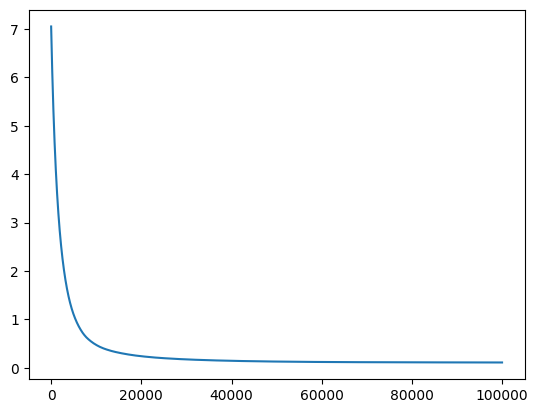

In [13]:
plt.plot(losses);